<br>
<center style="color:#180090; font-weight: bold; font-size: 3em">Esercitazione 11</center><br>
<center style="color:#555555; font-size: 2em; margin-bottom: 0.2cm;">Francesco Righini</center>
<center style="color:#555555; font-size: 1.5em">(931984)</center>

In [1]:
# importazione librerie
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Per prendere confidenza con le reti neurali, esplorare come la regressione lineare della funzione $y=2x+1$ dipenda dal numero di epoche $N_{\mathrm{epochs}}$, dal numero di dati $N_{\mathrm{train}}$ e dal rumore sui dati $\sigma$. Provare a migliorare il fitting operando su questi parametri.
</div>

<div style="font-size: 0.43cm;">
Per fittare i dati di una legge lineare non serve altro che $1$ neurone. Infatti una qualunque legge lineare del tipo $y=mx+q$ può essere espressa da un neurone con bias $q$, peso $m$ e funzione di attivazione lineare.
    
La rete è pertanto la più semplice possibile.
</div>

<div style="font-size: 0.43cm;">
In queste prime prove si fa variare il numero di dati di allenamento $N_{\mathrm{train}}$ e l'intensità del rumore con cui vengono "sporcati" $\sigma$.
</div>

In [2]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [3]:
def f(x):
    return 2*np.array(x)+1

# generate training inputs
n_trains = [3200,10000,32000]
np.random.seed(0)
x_train = [np.random.uniform(-1, 1, n_train) for n_train in n_trains]
x_valid = [np.random.uniform(-1, 1, int(n_train/10)) for n_train in n_trains]
for i in range(3):
    x_valid[i].sort()
y_target = f(x_valid)

sigmas = [0.1,0.2,0.5] # noise standard deviations
y_train = [[np.random.normal(f(x), sigma) for x in x_train] for sigma in sigmas]
y_valid = [[np.random.normal(f(x), sigma) for x in x_valid] for sigma in sigmas]

epo = 30

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [4]:
tutto = np.empty(shape=[len(sigmas),len(n_trains),2,epo])
for i_s in range(len(sigmas)):
    for i_n in range(len(n_trains)):
        print()
        print('Sigma:     ', sigmas[i_s])
        print('# trains:', n_trains[i_n])
        # create model
        model = tf.keras.Sequential()
        model.add(Dense(1, input_shape=(1,)))
        # compile model
        model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        history = model.fit(x=x_train[i_n], y=y_train[i_s][i_n], 
                  batch_size=32, epochs=epo,
                  shuffle=True,
                  validation_data=(x_valid[i_n], y_valid[i_s][i_n]),
                  verbose=0)

        res = [history.history['loss'] , history.history['val_loss']]
        #print('losses:    ', res)
        tutto[i_s][i_n] = res;


Sigma:    0.1
# trains: 3200

Sigma:    0.1
# trains: 10000

Sigma:    0.1
# trains: 32000

Sigma:    0.2
# trains: 3200

Sigma:    0.2
# trains: 10000

Sigma:    0.2
# trains: 32000

Sigma:    0.5
# trains: 3200

Sigma:    0.5
# trains: 10000

Sigma:    0.5
# trains: 32000


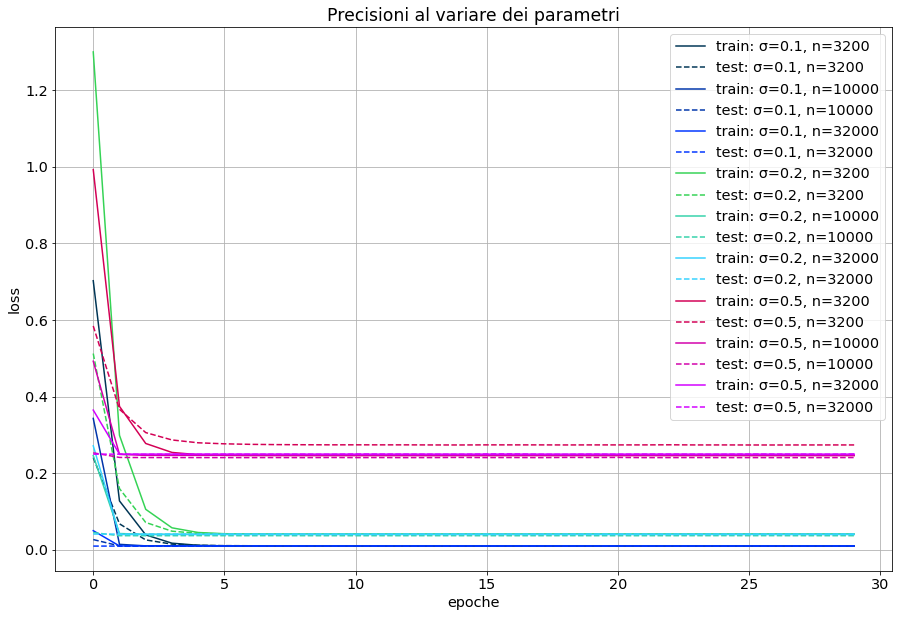

In [5]:
plt.figure(figsize=(15,10))

for i_s in range(len(sigmas)):
    for i_n in range(len(n_trains)):
        color = ( ((i_s%3)/2.2)**2 , (((i_s+1)%3)/2.2)**2 , (i_n+1)/(len(n_trains)+0) )
        plt.plot(tutto[i_s][i_n][0], color=color,label='train: '+'σ='+str(sigmas[i_s])+', n='+str(n_trains[i_n]))
        plt.plot(tutto[i_s][i_n][1], color=color,label='test: '+'σ='+str(sigmas[i_s])+', n='+str(n_trains[i_n]), linestyle='dashed')

plt.title('Precisioni al variare dei parametri')
plt.ylabel('loss')
plt.xlabel('epoche')
plt.legend(loc='best')
plt.grid(True)
plt.show()

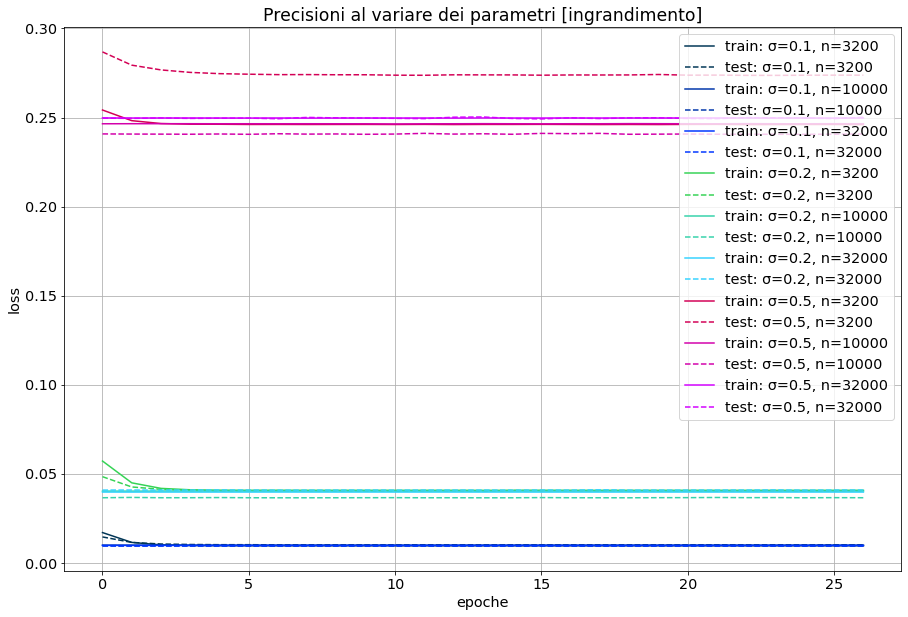

In [6]:
plt.figure(figsize=(15,10))

for i_s in range(len(sigmas)):
    for i_n in range(len(n_trains)):
        color = ( ((i_s%3)/2.2)**2 , (((i_s+1)%3)/2.2)**2 , (i_n+1)/(len(n_trains)+0) )
        plt.plot(tutto[i_s][i_n][0][3:], color=color,label='train: '+'σ='+str(sigmas[i_s])+', n='+str(n_trains[i_n]))
        plt.plot(tutto[i_s][i_n][1][3:], color=color,label='test: '+'σ='+str(sigmas[i_s])+', n='+str(n_trains[i_n]), linestyle='dashed')

plt.title('Precisioni al variare dei parametri [ingrandimento]')
plt.ylabel('loss')
plt.xlabel('epoche')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<div style="font-size: 0.43cm;">
Nelle prime epoche (più o meno le prime 3), le reti allenate con pochi dati hanno loss maggiori e di quelle delle reti allenate con tanti dati (a parità di rumore). Da un numero esiguo di epoche (circa 5) in poi, si giunge ad una situazione di stabilità indipendentemente dal numero di dati $N_{\mathrm{train}}$. Il parametro che discrimina tra una rete più performante e una meno performante è il rumore dei dati. Dopo poche epoche di allenamento, le reti neurali si stabilizzano con una precisione che dipende prevalentemente dal rumore dei dati con cui sono state allenate: non si riesce a compensare il rumore dei dati con più epoche di calcolo.
</div>

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 2</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Provare ad estendere il modello per interpolare il seguente polinomio di terzo grado:

$$
f(x)=4-3x-2x^2+3x^3
$$
con $x \in [-1,1]$.

Per impratichirsi con le reti neurali, esplorare diverse scelte di:
    
- numero di layers
- numero di neuroni per ogni layer
- funzioni di attivazione
- algoritmi di ottimizzazione
- funzioni loss
  
Mettere alla prova la rete neurale con nuovi dati, anche fuori dal range in cui è stata allenata.

Sintetizzare cosa è emerso sulle relazioni tra la complessità del modello (il numero di parametri), la bontà del fit e la capacità predittiva.
</div>

In [7]:
def f(x):
    return 3*x**3 - 2*x**2 - 3*x + 4 

<div style="font-size: 0.43cm;">
Si esplora ora come varia la capacità di fitting della rete neurale al variare del numero di layer. Il numero di neuroni per ogni layer è fissato a $5$.
</div>

In [8]:
# generate training inputs
epo = 40
n_train = 40000
np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, int(n_train/10))
x_valid.sort()
y_target = f(x_valid)

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)



lay = [2,3,4,5,6,7,8,9,10]
#neu = [2,4,6,8,10]
neu = [5]


z = np.empty(shape=[len(lay),len(neu),2,epo])

# build model

for l in lay:
    for n in neu:

        print()
        print('# layers :', l)
        print('# neurons:', n)

        model = tf.keras.Sequential()

        for i in range(l):
            model.add(Dense(n, input_shape=(1,), activation='elu'))

        # compile the model choosing optimizer, loss and metrics objects
        model.compile(optimizer='sgd', loss='mse', metrics='mse')
        #model.summary()

        # train model
        history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=epo, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

        z[lay.index(l),neu.index(n),0] = history.history['loss']
        z[lay.index(l),neu.index(n),1] = history.history['val_loss']


# layers : 2
# neurons: 5

# layers : 3
# neurons: 5

# layers : 4
# neurons: 5

# layers : 5
# neurons: 5

# layers : 6
# neurons: 5

# layers : 7
# neurons: 5

# layers : 8
# neurons: 5

# layers : 9
# neurons: 5

# layers : 10
# neurons: 5


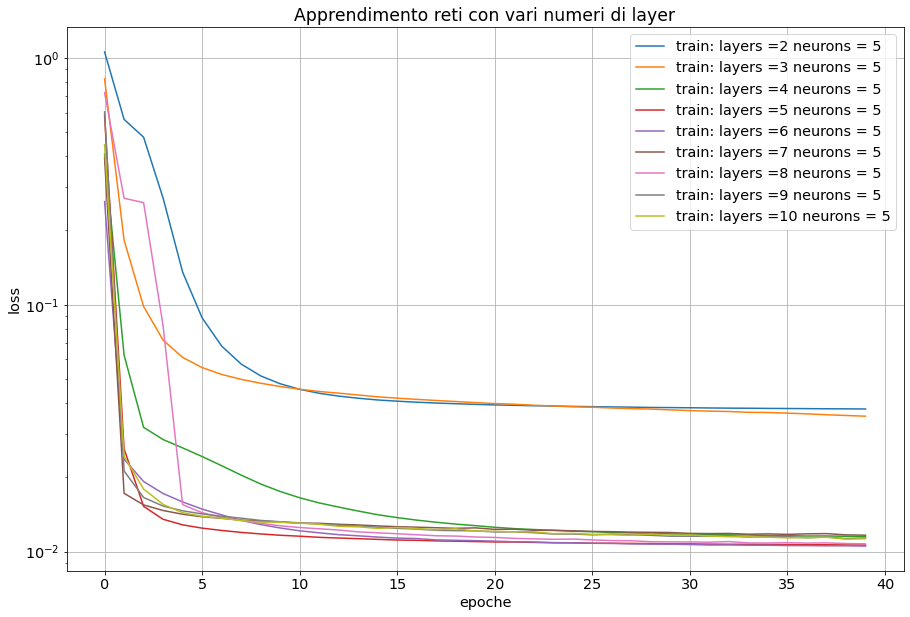

In [9]:
plt.figure(figsize=(15,10))

for i_l in range(len(lay)):
    for i_n in range(len(neu)):
        plt.plot(z[i_l][i_n][0],label='train: layers =' +str(lay[i_l])+" neurons = "+str(neu[i_n]))

plt.title('Apprendimento reti con vari numeri di layer')
plt.ylabel('loss')
plt.xlabel('epoche')
plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)
plt.show()

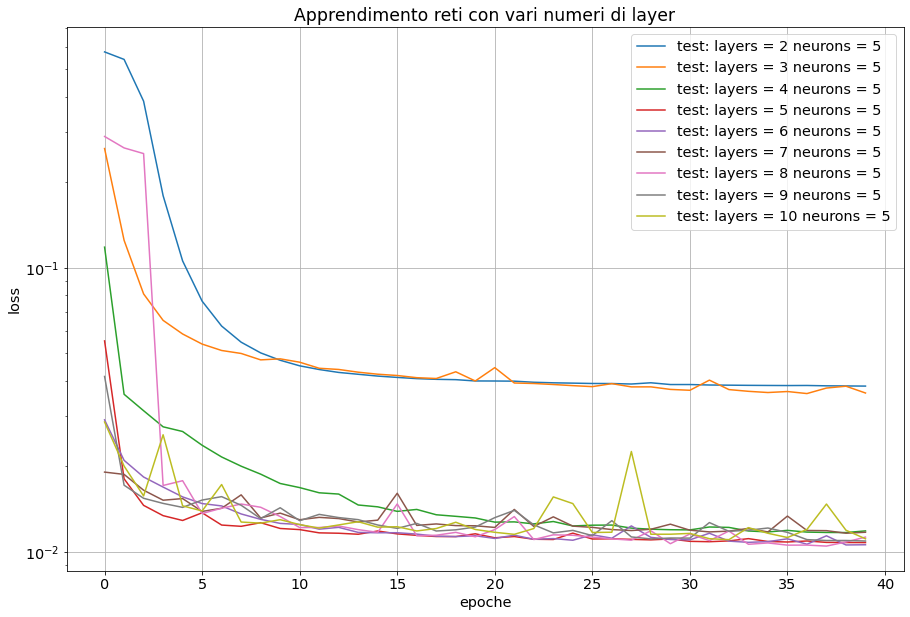

In [10]:
plt.figure(figsize=(15,10))

for i_l in range(len(lay)):
    for i_n in range(len(neu)):
        plt.plot(z[i_l][i_n][1],label='test: layers = '+str(lay[i_l])+" neurons = "+str(neu[i_n]))

plt.title('Apprendimento reti con vari numeri di layer')
plt.ylabel('loss')
plt.xlabel('epoche')
plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<div style="font-size: 0.43cm;">
Nelle prime fasi di allenamento (entro le 5 epoche), non c'è una gerarchia precisa tra le reti. All'incirca dalla quinta epoca comincia ad emergere una netta separazione tra le due reti con 2 e 3 layer e quelle con più layer (ovviamente più performanti). Il "gruppo di testa" si divide a sua volta in due sottogruppi molto vicini, ma ben separati (attorno all'epoca 25).
In sintesi, si hanno tre gruppi (dal più performante al meno performante):

- 5, 6, 8 layers
- 4, 7, 9, 10 layers
- 2, 3 layers

Il fatto che la separazione non sia netta lascia qualche dubbio sulla significatività della piccola separazione tra i due gruppi. Stando a quanto osservato, comunque, sembra che aumentare il numero di layer aiuti le performance della rete, ma aumentandolo eccessivamentenon si notano miglioramenti, anzi, dei lievi peggioramenti. Questo potrebbe essere frutto dell'incredibile aumento del numero di parametri della rete e quindi alla difficoltà nell'allenamento.
</div>

<div style="font-size: 0.43cm;">
In questa seconda parte, tenendo fisso il numero di layer a $5$, si sondano le capacità adattative della rete neurale in funzione del numero di neuroni per layer.
</div>

In [11]:
# generate training inputs
epo = 40
n_train = 40000
np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, int(n_train/10))
x_valid.sort()
y_target = f(x_valid)

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)



#lay = [2,3,4,5,6,7,8,9,10]
neu = [2,4,6,8,10,12,14]
lay = [5]


z = np.empty(shape=[len(lay),len(neu),2,epo])

# build model

for l in lay:
    for n in neu:

        print()
        print('# layers :', l)
        print('# neurons:', n)

        model = tf.keras.Sequential()

        for i in range(l):
            model.add(Dense(n, input_shape=(1,), activation='elu'))

        # compile the model choosing optimizer, loss and metrics objects
        model.compile(optimizer='sgd', loss='mse', metrics='mse')
        #model.summary()

        # train model
        history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=epo, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

        z[lay.index(l),neu.index(n),0] = history.history['loss']
        z[lay.index(l),neu.index(n),1] = history.history['val_loss']


# layers : 5
# neurons: 2

# layers : 5
# neurons: 4

# layers : 5
# neurons: 6

# layers : 5
# neurons: 8

# layers : 5
# neurons: 10

# layers : 5
# neurons: 12

# layers : 5
# neurons: 14


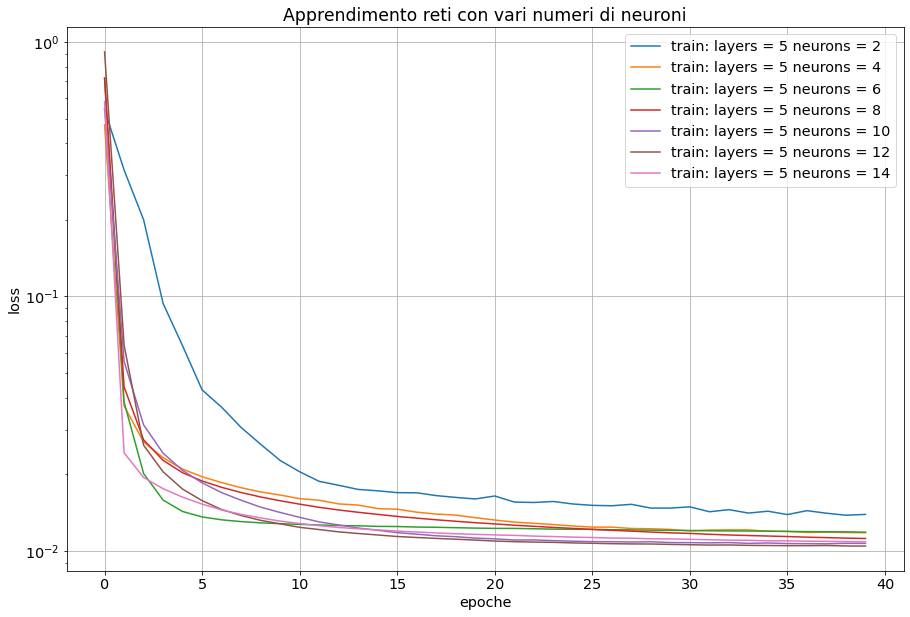

In [12]:
plt.figure(figsize=(15,10))

for i_l in range(len(lay)):
    for i_n in range(len(neu)):
        plt.plot(z[i_l][i_n][0],label='train: layers = '+str(lay[i_l])+" neurons = "+str(neu[i_n]))

plt.title('Apprendimento reti con vari numeri di neuroni')
plt.ylabel('loss')
plt.xlabel('epoche')
plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)
plt.show()

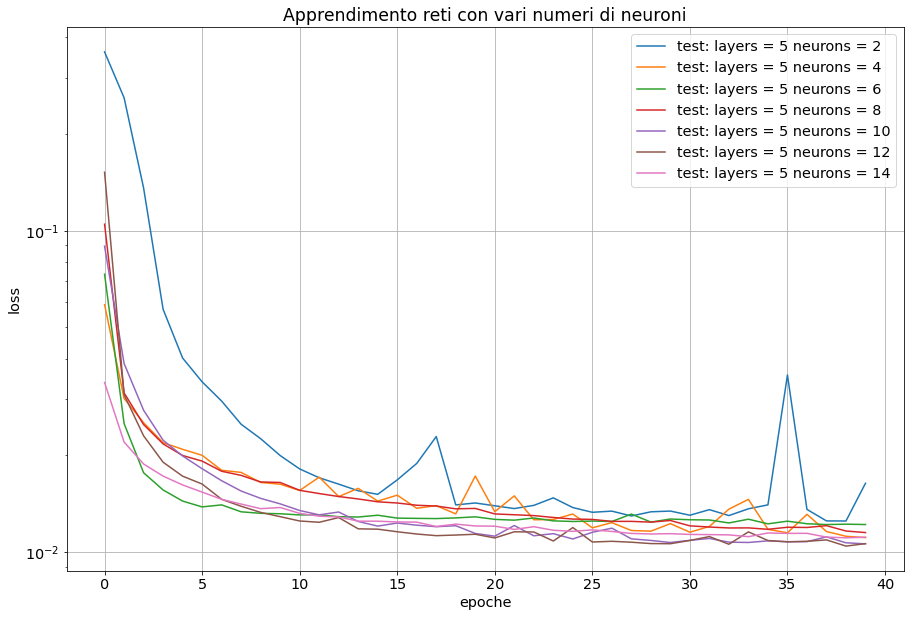

In [13]:
plt.figure(figsize=(15,10))

for i_l in range(len(lay)):
    for i_n in range(len(neu)):
        plt.plot(z[i_l][i_n][1][:],label='test: layers = '+str(lay[i_l])+" neurons = "+str(neu[i_n]))

plt.title('Apprendimento reti con vari numeri di neuroni')
plt.ylabel('loss')
plt.xlabel('epoche')
plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<div style="font-size: 0.43cm;">
In questo caso si nota una gerarchia meno netta, ma che suggerisce che l'aggiunta di neuroni (circa 6), dopo una certa soglia, non provoca un miglioramento nella precisione della rete neurale.
</div>

<div style="font-size: 0.43cm;">
Si procede ora al fitting con una rete neurale composta da $5$ layer con $4$ neuroni ciascuno.
</div>

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_100 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_101 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_102 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_103 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 5         
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________

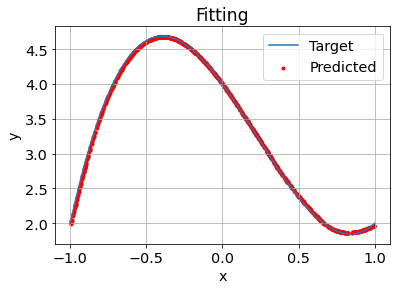

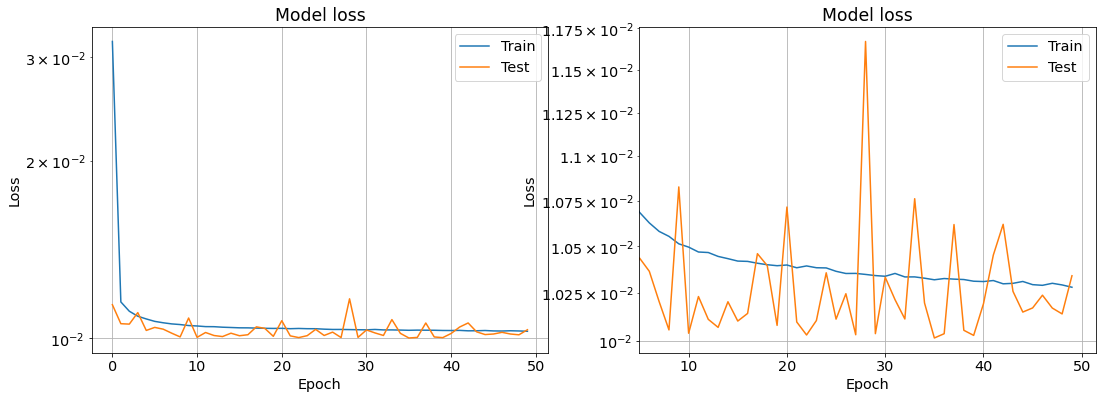

In [14]:
# generate training inputs
epo = 50
n_train = 400000
np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, int(n_train/10))
x_valid.sort()
y_target = f(x_valid)

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)



# build model
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(1,), activation='elu'))
model.add(Dense(4, input_shape=(1,), activation='elu'))
model.add(Dense(4, input_shape=(1,), activation='elu'))
model.add(Dense(4, input_shape=(1,), activation='elu'))
model.add(Dense(4, input_shape=(1,), activation='elu'))
model.add(Dense(1, input_shape=(1,), activation='elu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics='mse')
model.summary()

# train model
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epo,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0)

# evaluate model
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# show prediction
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',marker='.')
plt.plot(x_valid, y_target)
plt.title('Fitting')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['Target','Predicted'], loc='best')
plt.grid(True)
plt.show()

# look into training history: training and validation loss values
fig, axs = plt.subplots(1,2,figsize=(18,6))

ax = axs.flat[0]
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set(xlabel='Epoch',ylabel='Loss',title='Model loss')
ax.set_yscale('log')
ax.legend(['Train', 'Test'], loc='best')
ax.grid(True)

ax = axs.flat[1]
primo = history.history['loss'][5]
ax.plot([primo,primo,primo,primo]+history.history['loss'][4:])
ax.plot([primo,primo,primo,primo]+history.history['val_loss'][4:])
ax.set(xlabel='Epoch',ylabel='Loss',title='Model loss')
ax.set_xlim(left=5)
ax.set_ylim(auto=True)
ax.set_yscale('log')
ax.legend(['Train', 'Test'], loc='best')
ax.grid(True)

<div style="font-size: 0.43cm;">
Come si può constatare anche dalla prima figura, la rete è stata in grado di eseguire corretamente il fitting.
</div>

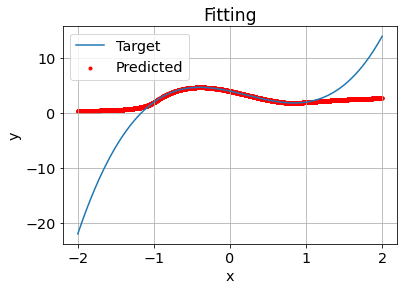

In [15]:
# show prediction
x_predicted = np.random.uniform(-2, 2, 4000)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',marker='.')
x_predicted.sort()
y_real = f(x_predicted)
plt.plot(x_predicted, y_real)
plt.title('Fitting')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['Target','Predicted'], loc='best')
plt.grid(True)
plt.show()

<div style="font-size: 0.43cm;">
Come ci si aspettava, la rete è capace di fare buone previsioni nell'intervallo in cui è stata allenata, ma restituisce valori completamente sbagliati una volta che la si testa in range di valori in cui non si è allenata.
</div>

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 3</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Provare ad estendere il modello per eseguire il fit su una semplice funzione trigonometrica bidimensionale, come
    $$f(x,y) = \sin(x^2+y^2)$$
nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.
</div>

<div style="font-size: 0.43cm;">
In questo nuovo caso si è voluta utilizzare la stessa rete neurale del fit precedente, fatta eccezione per il primo layer (dato che l'input è un punto nel piano, deve essere immagazzinato in $2$ neuroni).
</div>

In [16]:
def f(x,y):
    return np.sin(x**2+y**2)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_106 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_107 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_108 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_109 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________

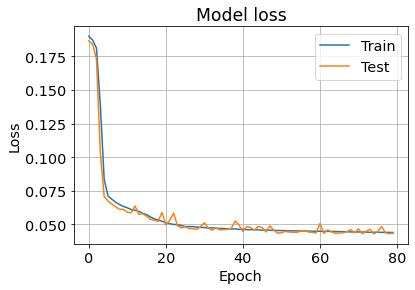

In [17]:
# generate training inputs
epo = 80
n_train = 100000
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, n_train)
y_train = np.random.uniform(-1.5, 1.5, n_train)
x_valid = np.random.uniform(-1.5, 1.5, int(n_train/5))
y_valid = np.random.uniform(-1.5, 1.5, int(n_train/5))
#x_valid.sort()
#y_valid.sort()
z_target = np.sin(x_valid**2 + y_valid**2)

train_data = np.stack((x_train, y_train), axis=1) # creo array dritti
valid_data = np.stack((x_valid, y_valid), axis=1)

sigma = 0.2
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma)
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)



# build model
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(2,), activation='elu'))
model.add(Dense(4, input_shape=(1,), activation='elu'))
model.add(Dense(4, input_shape=(1,), activation='elu'))
model.add(Dense(4, input_shape=(1,), activation='elu'))
model.add(Dense(4, input_shape=(1,), activation='elu'))
model.add(Dense(1, input_shape=(1,), activation='elu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics='mse')
model.summary()

# train model
history = model.fit(x=train_data, y=z_train, 
          batch_size=32, epochs=epo,
          shuffle=True,
          validation_data=(valid_data, z_valid),
          verbose=0)

# evaluate model
score = model.evaluate(valid_data, z_target, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# show prediction
# ...

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

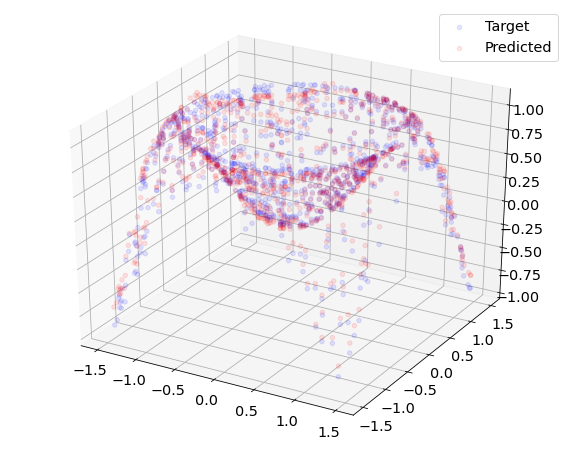

In [18]:
# show 3D prediction
x_predicted = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = np.random.uniform(-1.5, 1.5, 1000)
z_giusti = np.sin(x_predicted**2 + y_predicted**2)
data_predicted = np.stack((x_predicted, y_predicted), axis=1)
z_predicted = model.predict(data_predicted)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(x_predicted, y_predicted, z_giusti, color='b', label='target data',alpha=0.1)
ax.scatter3D(x_predicted, y_predicted, z_predicted, color='r', label='predictions',alpha=0.1)
plt.legend(['Target','Predicted'], loc='best')
plt.grid(True)
plt.show()

<div style="font-size: 0.43cm;">
La rete sembra dare una risposta abbastanza buona con loss inferiore a $0.05$. Dalla figura tridimensionale è difficile capire graficamente quanto buono sia il fit, pertanto si è deciso di tagliare una "fetta" lungo la diagonale del primo-terzo quadrante.
</div>

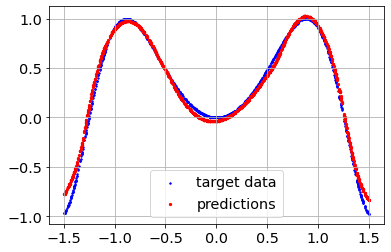

In [19]:
# lungo la diagonale
x_predicted = np.random.uniform(-1.5, 1.5, 1000)

z_giusti = np.sin(x_predicted**2 + x_predicted**2)
data_predicted = np.stack((x_predicted, x_predicted), axis=1)
z_predicted = model.predict(data_predicted)

plt.scatter(x_predicted, z_giusti, c='b', s=2, label='target data')
plt.scatter(x_predicted, z_predicted, c='r', s=5, label='predictions')
plt.legend()
plt.grid(True)
plt.show()


<div style="font-size: 0.43cm;">
La previsione della rete è abbastanza buona, eccezion fatta per gli estremi, dove la previsione e il valor vero si discostano di $0.25$.
    
È rimarchevole il fatto che la rete, nel tentativo di fittare una funzione simmetrica, non sia però simmetrica nel fornire le previsioni (si confrontino i valori in $-0.5$ e $0.5$). Probabilmente questo è dovuto al fatto che le funzioni di attivazione non sono simmetriche.
</div>